## detecting diabetes using neural networks

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras as tfk

In [37]:
data=pd.read_csv('diabetes.csv')

In [38]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
data.columns,data.shape

(Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object'), (768, 9))

In [40]:
dr=data.corr()

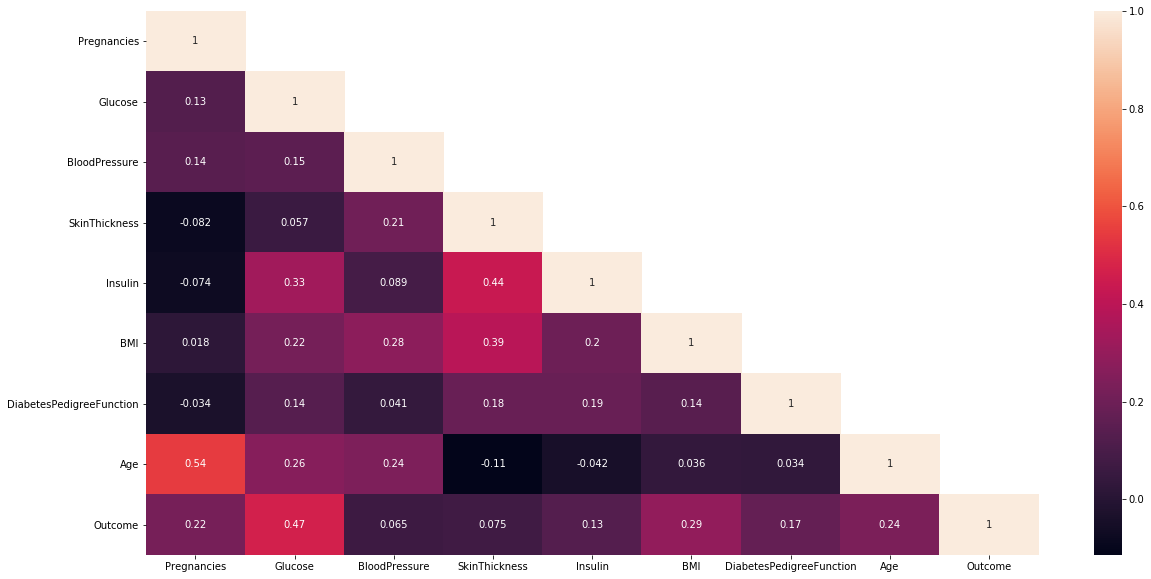

In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
mask=np.array(dr)
mask[np.tril_indices_from(mask)]=False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(dr,mask=mask,annot=True)

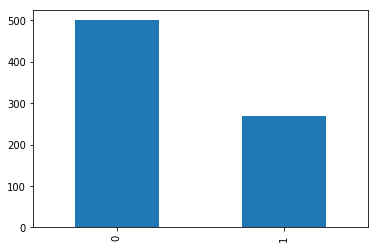

In [42]:
data['Outcome'].value_counts().plot.bar()

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
##from sklearn.preprocessing import MinMaxScaler
##scaler=MinMaxScaler(feature_range=(0, 1))
##data=scaler.fit_transform(data)

### A. considering 3 independent and 1 dependent variables and performing model using stochastic gradient algorithm with epochs=100

In [45]:
X=['Pregnancies','Glucose','BloodPressure']

In [46]:
x=data[X].values

In [47]:
Y=data['Outcome']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=0)

In [51]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((614, 3), (614,), (154, 3), (154,))

In [52]:
x_train.shape[1]

3

In [55]:
model=tfk.models.Sequential()
model.add(tfk.layers.Dense(8,activation=tfk.activations.relu,input_dim=x_train.shape[1]))
model.add(tfk.layers.Dense(1,activation=tfk.activations.sigmoid))
model.compile(loss=tfk.losses.binary_crossentropy,optimizer=tfk.optimizers.SGD() ,metrics=['acc'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [80]:
###y_train=tfk.utils.to_categorical(y_train)
y=[5,7,9,11,13]
x=[1,2,3,4,5]



In [57]:
model.fit(x_train ,y_train,epochs=100,batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
614/614 [==============================] - 2s 3ms/sample - loss: 5.8021 - acc: 0.6384
Epoch 2/100
614/614 [==============================] - 0s 430us/sample - loss: 5.8009 - acc: 0.6401
Epoch 3/100
614/614 [==============================] - 0s 416us/sample - loss: 5.8009 - acc: 0.6401
Epoch 4/100
614/614 [==============================] - 0s 416us/sample - loss: 5.8009 - acc: 0.6401
Epoch 5/100
614/614 [==============================] - 0s 464us/sample - loss: 5.8009 - acc: 0.6401
Epoch 6/100
614/614 [==============================] - 0s 458us/sample - loss: 5.8009 - acc: 0.6401
Epoch 7/100
614/614 [==============================] - 0s 450us/sample - loss: 5.8009 - acc: 0.6401
Epoch 8/100
614/614 [==============================] - 0s 396us/sample - loss: 5.8009 - acc: 0.6401
Epoch 9/100
614/614 [==============================] - 0s 360us/sample - loss: 5.8009 - acc: 0.6401
Epoch 10/100
614/614 [==============================] 

## B. considering 1 dependent variable and remaining all as independent variables and performing model using adam optimizer 

In [58]:
X1=data.iloc[:,:-1]

In [59]:
Y1=data['Outcome']

In [60]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.2)

In [61]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((614, 8), (154, 8), (614,), (154,))

In [62]:
model=tfk.models.Sequential()
model.add(tfk.layers.Dense(16,activation=tfk.activations.relu,input_dim=x1_train.shape[1]))
model.add(tfk.layers.Dense(16,activation=tfk.activations.relu))
model.add(tfk.layers.Dense(16,activation=tfk.activations.relu))
model.add(tfk.layers.Dense(1,activation=tfk.activations.sigmoid))
model.compile(loss=tfk.losses.binary_crossentropy,optimizer=tfk.optimizers.Adam()  ,metrics=['acc'])

In [63]:
model.fit(x1_train,y1_train,epochs=150,batch_size=10)

Epoch 1/150
614/614 [==============================] - 1s 2ms/sample - loss: 1.0409 - acc: 0.6091
Epoch 2/150
614/614 [==============================] - 0s 530us/sample - loss: 0.7060 - acc: 0.6629
Epoch 3/150
614/614 [==============================] - 0s 575us/sample - loss: 0.6926 - acc: 0.6482
Epoch 4/150
614/614 [==============================] - 0s 561us/sample - loss: 0.6555 - acc: 0.6694
Epoch 5/150
614/614 [==============================] - 0s 562us/sample - loss: 0.6238 - acc: 0.6808
Epoch 6/150
614/614 [==============================] - 0s 416us/sample - loss: 0.6456 - acc: 0.6661
Epoch 7/150
614/614 [==============================] - 0s 406us/sample - loss: 0.6184 - acc: 0.6824
Epoch 8/150
614/614 [==============================] - 0s 403us/sample - loss: 0.5882 - acc: 0.6954
Epoch 9/150
614/614 [==============================] - 0s 409us/sample - loss: 0.6206 - acc: 0.6987
Epoch 10/150
614/614 [==============================] - 0s 411us/sample - loss: 0.6089 - acc: 0.6971
E